In [2]:
import pandas as pd
import numpy_financial as npf

In [16]:
snp_rates = pd.read_csv("S&P500 Historical Annual Returns.csv")
snp_rates
column = snp_rates['Annual Return'].head(10)
column

0    0.06
1   -0.19
2    0.27
3    0.16
4    0.29
5   -0.06
6    0.19
7    0.10
8   -0.01
9    0.11
Name: Annual Return, dtype: float64

In [29]:
def retirement_cash_flows(principal, interest_rate,current_age, retirement_age, death_age):
    cash_flows = []
    income_retirement_1 = principal * (1 + interest_rate)**(retirement_age-current_age)
    for i in range(retirement_age-1, death_age):
        cash_flow = income_retirement_1 * (1 + interest_rate)**(i - retirement_age + 1)
        cash_flows.append(cash_flow)
    return cash_flows

principal = 70000
interest_rate = 0.025
retirement_age = 65
death_age = 95
current_age = 25

after_tax_retirement_cashflows = retirement_cash_flows(principal, interest_rate, current_age, retirement_age, death_age)
print(after_tax_retirement_cashflows)

[187954.46868729743, 192653.33040447984, 197469.66366459185, 202406.40525620658, 207466.56538761174, 212653.22952230202, 217969.56026035955, 223418.79926686853, 229004.2692485402, 234729.3759797537, 240597.61037924752, 246612.5506387287, 252777.86440469688, 259097.31101481427, 265574.7437901846, 272214.1123849392, 279019.4651945627, 285994.9518244267, 293144.8256200373, 300473.44626053824, 307985.28241705167, 315684.91447747796, 323577.0373394149, 331666.4632729002, 339958.1248547227, 348457.0779760907, 357168.504925493, 366097.71754863026, 375250.160487346, 384631.41449952964, 394247.19986201776]


In [37]:
#THis cell takes the net present value of the cashflows as if at the beginning of the year
npf.npv(interest_rate/12, after_tax_retirement_cashflows)

5714337.050004427

In [42]:
def retirement_cash_flows(principal, interest_rate, current_age, retirement_age, death_age):
    cash_flows = []
    income_retirement_1 = principal/12 * (1 + interest_rate/12)**((retirement_age-current_age)*12)
    for i in range((retirement_age*12), (death_age*12)):
        cash_flow = income_retirement_1 * (1 + interest_rate/12)**(i - retirement_age*12 - 1)
        cash_flows.append(cash_flow)
    return cash_flows

principal = 70000
interest_rate = 0.025
retirement_age = 65
death_age = 95
current_age = 25

after_tax_retirement_cashflows = retirement_cash_flows(principal, interest_rate, current_age, retirement_age, death_age)
print(after_tax_retirement_cashflows)
len(after_tax_retirement_cashflows)

[15807.22642105987, 15840.158142770411, 15873.158472234518, 15906.22755238501, 15939.365526452479, 15972.572537965925, 16005.848730753354, 16039.194248942425, 16072.609236961058, 16106.09383953806, 16139.648201703765, 16173.27246879065, 16206.966786433968, 16240.731300572374, 16274.566157448568, 16308.471503609919, 16342.447485909108, 16376.494251504753, 16410.611947862057, 16444.80072275344, 16479.06072425918, 16513.39210076805, 16547.79500097799, 16582.26957389669, 16616.81596884231, 16651.434335444068, 16686.124823642913, 16720.88758369217, 16755.722766158196, 16790.63052192103, 16825.611002175032, 16860.664358429563, 16895.790742509627, 16930.990306556523, 16966.26320302852, 17001.6095847015, 17037.029604669628, 17072.523416346026, 17108.091173463414, 17143.7330300748, 17179.449140554123, 17215.239659596944, 17251.10474222111, 17287.044543767403, 17323.059219900253, 17359.14892660838, 17395.313820205483, 17431.554057330915, 17467.869794950355, 17504.2611903565, 17540.72840116975, 1

360

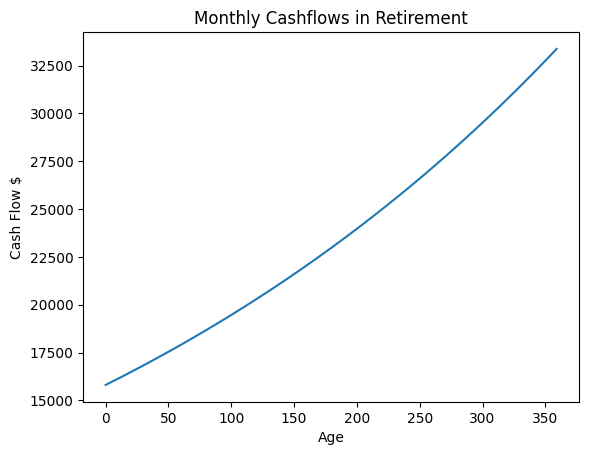

In [63]:
import matplotlib.pyplot as plt

def plot_cash_flows(after_tax_retirement_cashflows):
    years = range(len(after_tax_retirement_cashflows))
    plt.plot(years, after_tax_retirement_cashflows)
    plt.xlabel('Age')
    plt.ylabel('Cash Flow $')
    plt.title(f'Monthly Cashflows in Retirement')
    plt.show()

plot_cash_flows(after_tax_retirement_cashflows)
